In [1]:
import pickle

In [2]:
import glob

In [3]:
data_sample = glob.glob('Finished_Sim_Ue/*.pickle')

In [4]:
import numpy as np

In [5]:
trial_files = data_sample[np.random.randint(0, len(data_sample))]

In [6]:
print(trial_files)

Finished_Sim_Ue\sim_Ue_Bmeson_1.82858_0.016378937069540613.pickle


In [7]:
def look_at_data(fname):
    with open(fname, 'rb') as f:
        data = pickle.load(f)['Data']
    return np.inf not in data['position']

In [8]:
num_of_duds = 0
bad_files = []
for file in data_sample:
    good_val = look_at_data(file)
    if not good_val:
        num_of_duds += 1
        bad_files.append(file)
        
print(num_of_duds)
print(num_of_duds / len(data_sample))

856
0.31880819366852886


In [9]:
mixing_sq = dict()
for file in bad_files:
    single_mix = file[:-7].split('_')[-1]
    try:
        mixing_sq[single_mix] += 1
    except KeyError:
        mixing_sq[single_mix] = 1
print(mixing_sq)

{'0.1': 157, '0.016378937069540613': 147, '0.002682695795279727': 134, '0.00043939705607607863': 120, '7.196856730011514e-05': 102, '1.1787686347935867e-05': 84, '1.9306977288832498e-06': 54, '3.162277660168379e-07': 34, '5.1794746792312124e-08': 15, '8.483428982440726e-09': 8, '1.389495494373136e-09': 1}


In [10]:
def get_mix(fname):
    return float(fname[:-7].split('_')[-1])

def get_mass(fname):
    return float(fname[:-7].split('_')[-2])

In [11]:
triads_e = np.array([[get_mass(fname), get_mix(fname), fname in bad_files] for fname in data_sample])

In [12]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Mixing Squared')

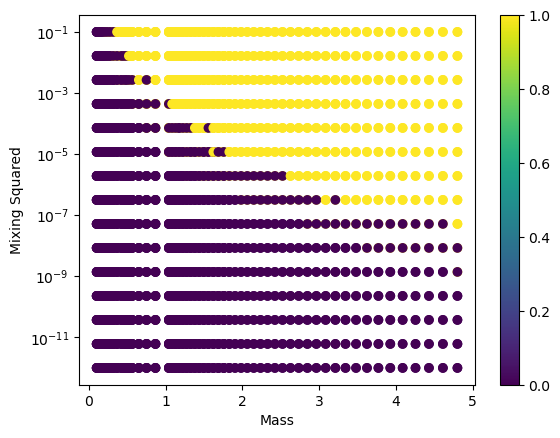

In [13]:
plt.scatter(triads_e[:,0], triads_e[:,1], c = triads_e[:,2])
plt.yscale('log')
#plt.xscale('log')
plt.colorbar()
plt.xlabel('Mass')
plt.ylabel('Mixing Squared')

In [14]:
data_sample = glob.glob('Finished_Sim_Umu/*.pickle')

bad_files = []
for file in data_sample:
    good_val = look_at_data(file)
    if not good_val:
        bad_files.append(file)
        
triads_mu = np.array([[get_mass(fname), get_mix(fname), fname in bad_files] for fname in data_sample])

Text(0, 0.5, 'Mixing Squared')

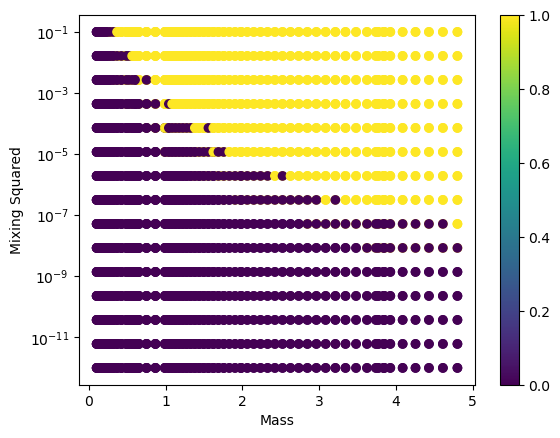

In [15]:
plt.scatter(triads_mu[:,0], triads_mu[:,1], c = triads_mu[:,2])
plt.yscale('log')
#plt.xscale('log')
plt.colorbar()
plt.xlabel('Mass')
plt.ylabel('Mixing Squared')

In [16]:
data_sample = glob.glob('Finished_Sim_Utau/*.pickle')

bad_files = []
for file in data_sample:
    good_val = look_at_data(file)
    if not good_val:
        bad_files.append(file)
        
triads_tau = np.array([[get_mass(fname), get_mix(fname), fname in bad_files] for fname in data_sample])

Text(0, 0.5, 'Mixing Squared')

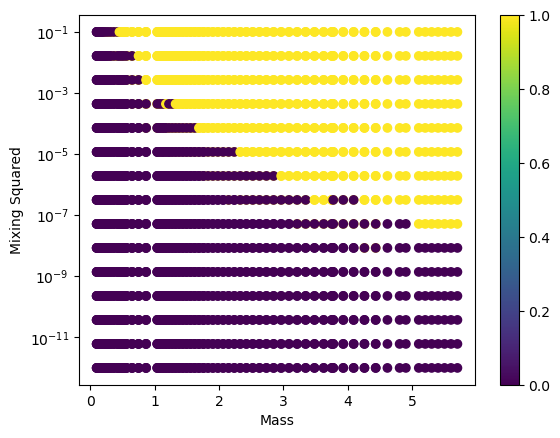

In [17]:
plt.scatter(triads_tau[:,0], triads_tau[:,1], c = triads_tau[:,2])
plt.yscale('log')
#plt.xscale('log')
plt.colorbar()
plt.xlabel('Mass')
plt.ylabel('Mixing Squared')

Text(0.5, 0.98, 'Successful in Purple')

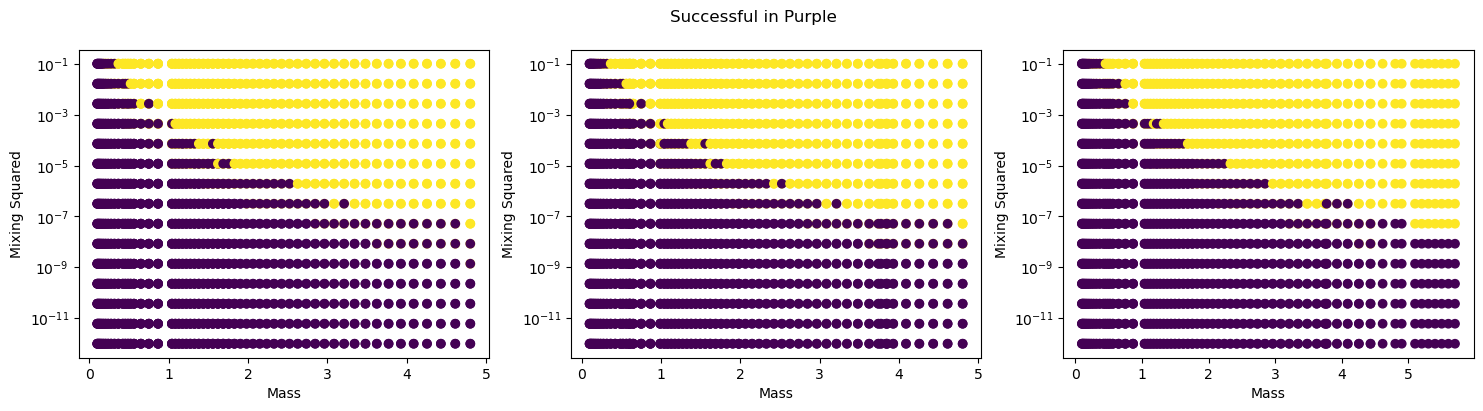

In [18]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (6 * 3, 4))
p = ax[2].scatter(triads_tau[:,0], triads_tau[:,1], c = triads_tau[:,2])
ax[1].scatter(triads_mu[:,0], triads_mu[:,1], c = triads_mu[:,2])
ax[0].scatter(triads_e[:,0], triads_e[:,1], c = triads_e[:,2])
for i in range(0,3):
    ax[i].set_yscale('log')
    #plt.xscale('log')
    ax[i].set_xlabel('Mass')
    ax[i].set_ylabel('Mixing Squared')
plt.suptitle('Successful in Purple')

#plt.savefig('badruns.pdf')

In [41]:
random_indices = np.random.randint(0, np.sum(triads_e[:,2]), 4)

In [42]:
random_indices.sort()

In [43]:
triads_e[:,:2][np.array(triads_e[:,2],dtype = bool)][random_indices]

array([[3.34370000e+00, 7.19685673e-05],
       [1.82858000e+00, 2.68269580e-03],
       [2.32787000e+00, 1.00000000e-01],
       [3.48098000e+00, 1.17876863e-05]])

In [28]:
triads_e[:,1][np.array(triads_e[:,2],dtype = bool)]

array([1.00000000e-01, 1.00000000e-01, 1.63789371e-02, 1.00000000e-01,
       1.63789371e-02, 1.00000000e-01, 1.63789371e-02, 1.00000000e-01,
       2.68269580e-03, 1.63789371e-02, 1.00000000e-01, 2.68269580e-03,
       1.63789371e-02, 1.00000000e-01, 2.68269580e-03, 1.63789371e-02,
       1.00000000e-01, 2.68269580e-03, 1.63789371e-02, 1.00000000e-01,
       4.39397056e-04, 2.68269580e-03, 1.63789371e-02, 1.00000000e-01,
       4.39397056e-04, 2.68269580e-03, 1.63789371e-02, 1.00000000e-01,
       4.39397056e-04, 2.68269580e-03, 1.63789371e-02, 1.00000000e-01,
       4.39397056e-04, 2.68269580e-03, 1.63789371e-02, 1.00000000e-01,
       7.19685673e-05, 4.39397056e-04, 2.68269580e-03, 1.63789371e-02,
       1.00000000e-01, 7.19685673e-05, 4.39397056e-04, 2.68269580e-03,
       1.63789371e-02, 1.00000000e-01, 1.17876863e-05, 7.19685673e-05,
       4.39397056e-04, 2.68269580e-03, 1.63789371e-02, 1.00000000e-01,
       1.17876863e-05, 7.19685673e-05, 4.39397056e-04, 2.68269580e-03,
      